In [292]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [293]:
print

<function print>

In [294]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

columns = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 
    'word_freq_data', 'word_freq_like', 'word_freq_time', 'word_freq_the', 
    'word_freq_dollar', 'word_freq_in', 'word_freq_it', 'word_freq_to', 'word_freq_and',
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total'
]

#เพิ่มข้อมูลเป้าหมาย
columns.append('spam')

#อ่านไฟล์
data = pd.read_csv('spambase.data', header=None, names=columns)


In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4601 entries, (0.0, 0.64, 0.64, 0.0, 0.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.0) to (0.0, 0.0, 0.65, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.65)
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will  

In [296]:
data.nunique().sort_values()

spam                             2
word_freq_like                  38
word_freq_hp                    53
word_freq_order                 99
word_freq_time                 106
word_freq_you                  106
word_freq_650                  108
word_freq_your                 110
word_freq_address              118
word_freq_george               125
word_freq_email                128
word_freq_make                 133
word_freq_labs                 136
word_freq_receive              143
word_freq_remove               148
word_freq_free                 156
word_freq_000                  159
word_freq_telnet               160
word_freq_hpl                  163
word_freq_mail                 164
word_freq_font                 177
word_freq_business             179
word_freq_credit               184
word_freq_lab                  186
word_freq_money                188
word_freq_3d                   197
word_freq_addresses            200
word_freq_in                   225
word_freq_data      

In [297]:
display(data.describe())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_like,word_freq_time,word_freq_the,word_freq_dollar,word_freq_in,word_freq_it,word_freq_to,word_freq_and,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,10.000000,4.410000,20.000000,7.140000,9.090000,18.750000,18.180000,11.110000,17.100000,5.450000,12.500000,20.830000,16.660000,33.330000,9.090000,14.280000,5.880000,12.500000,4.760000,18.180000,4.760000,20.000000,7.690000,6.890000,8.330000,11.110000,4.760000,7.14000

In [298]:
from imblearn.over_sampling import SMOTE
data5 = data.copy()
pre_process = StandardScaler()
target = 'spam'
xf = data5.columns
X = data5.drop([target],axis=1)
Y = data5[target]

print('Original class distribution:')
print(Y.value_counts())

Original class distribution:
spam
0    2788
1    1813
Name: count, dtype: int64


ดูความสัมพันธุ์ข้อมูล


spam
0    2788
1    1813
Name: count, dtype: int64


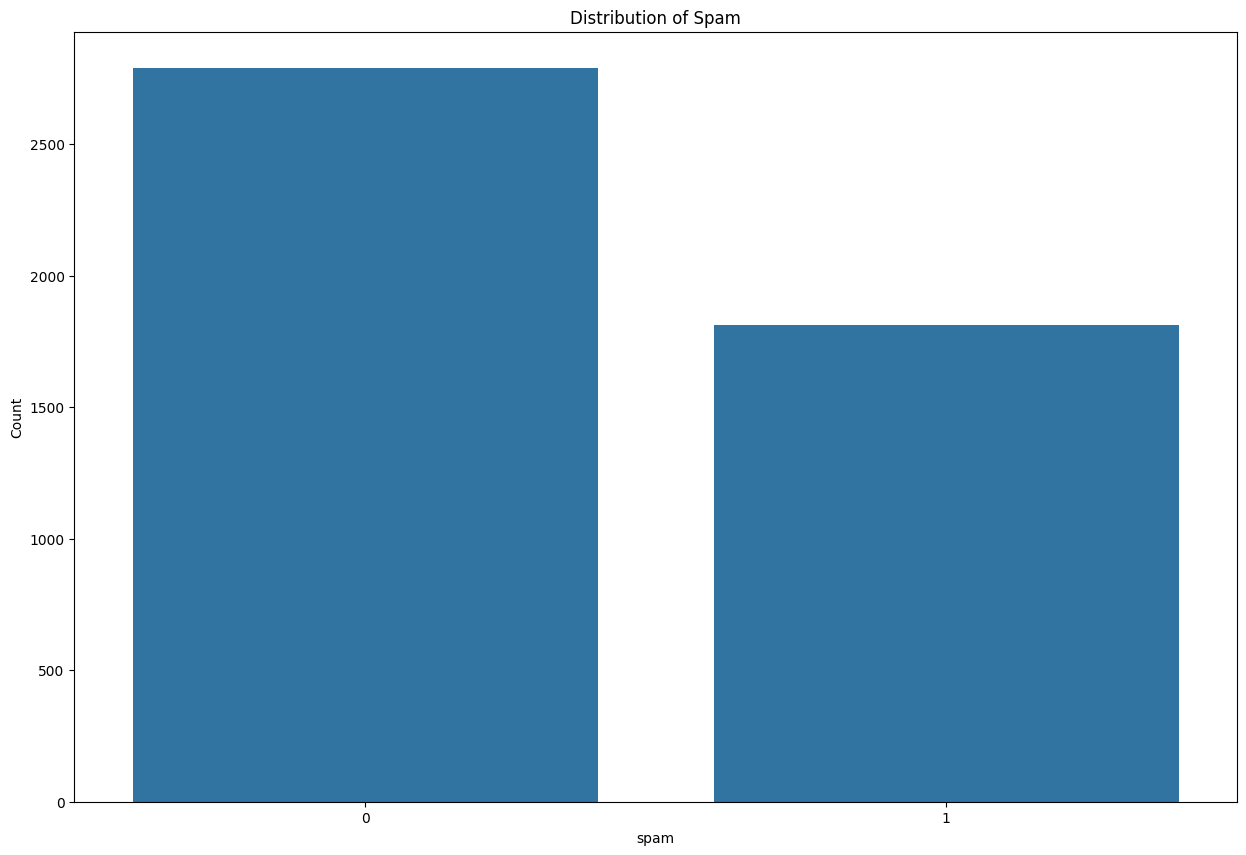

In [299]:
# แสดงจำนวนของแต่ละคลาสในคอลัมน์ 'class'
class_counts = data['spam'].value_counts()
print(class_counts)

# แสดงการกระจายตัวของคลาสในคอลัมน์ 'class'
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='spam')
plt.title('Distribution of Spam')
plt.xlabel('spam')
plt.ylabel('Count')
plt.show()

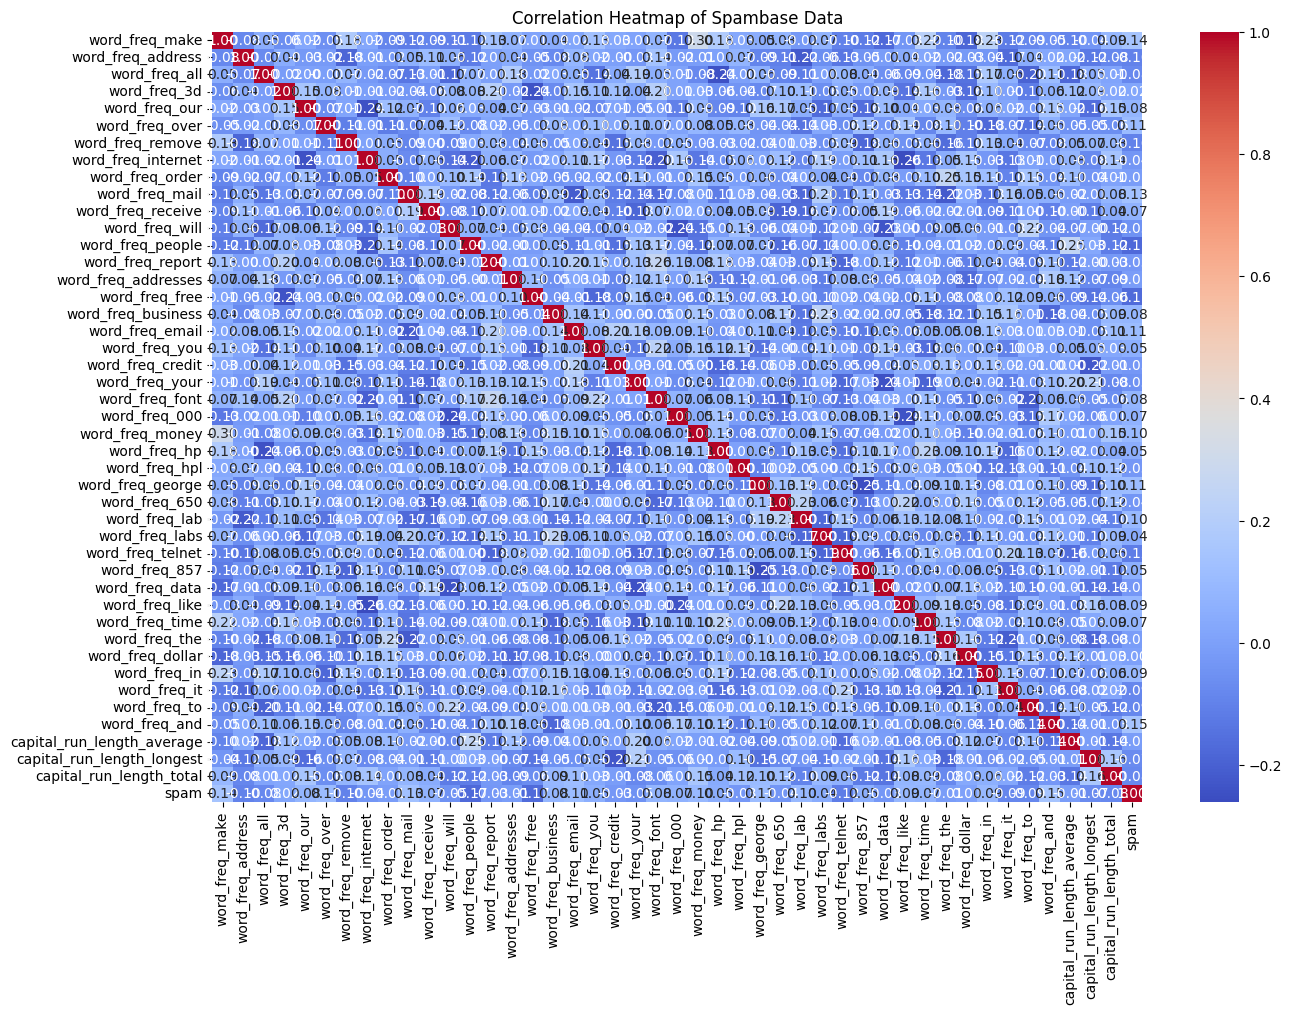

In [300]:
plt.figure(figsize=(15, 10))
correlation_matrix = sample_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Spambase Data')
plt.show()

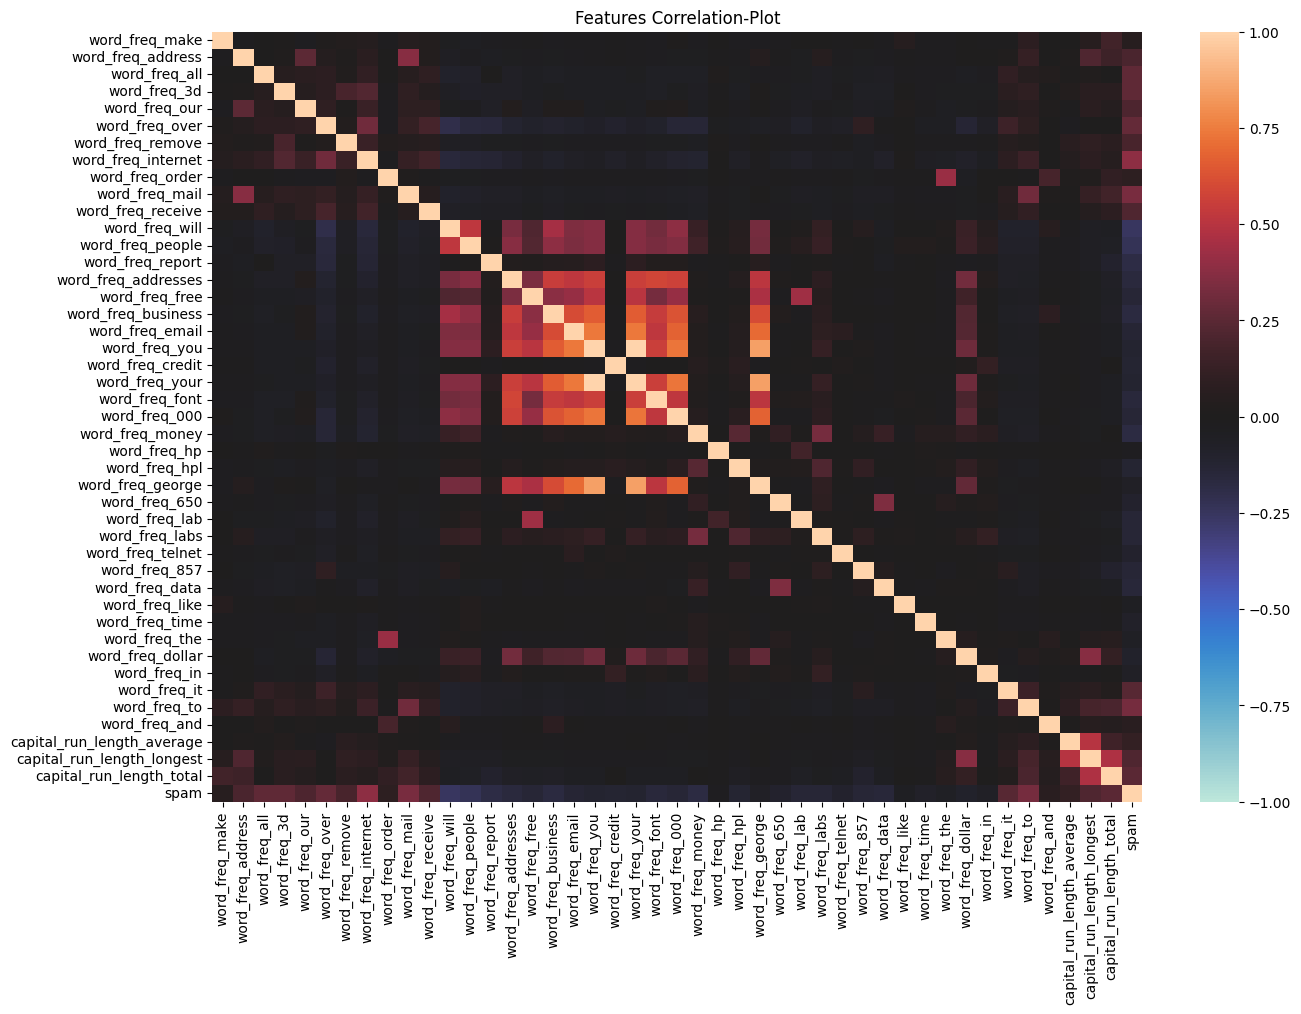

In [301]:
features = data.columns
plt.figure(figsize=[15,10])
plt.title('Features Correlation-Plot')
sns.heatmap(data[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

In [302]:
data.corr()['spam'].sort_values(ascending=False) # แสดงผลคอลัมน์ที่มี correlation กับ 'class' จากมากไปน้อย

spam                          1.000000
word_freq_internet            0.383234
word_freq_mail                0.334787
word_freq_to                  0.323629
word_freq_over                0.273651
word_freq_all                 0.263215
word_freq_3d                  0.263204
capital_run_length_total      0.249164
word_freq_it                  0.241888
word_freq_receive             0.216111
capital_run_length_longest    0.216097
word_freq_our                 0.204208
word_freq_address             0.195902
word_freq_remove              0.189761
capital_run_length_average    0.109999
word_freq_order               0.091860
word_freq_and                 0.065067
word_freq_make                0.060027
word_freq_hp                 -0.031035
word_freq_like               -0.044679
word_freq_the                -0.059630
word_freq_in                 -0.064709
word_freq_george             -0.064801
word_freq_time               -0.084020
word_freq_dollar             -0.089672
word_freq_telnet         

<h1 style="font-size: 50px; font-weight: bold; font-family: Helvetica">ปรับปรุงข้อมูล</h1>

In [303]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ OneHotEncoder และ StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# นำฟังก์ชัน StandardScaler() เก็บไว้ในตัวแปร scaler
scaler = StandardScaler()
# นำฟังก์ชัน OneHotEncoder() เก็บไว้ในตัวแปร onehot_encoder
onehot_encoder = OneHotEncoder( drop='first') 

In [304]:
# X เป็น Features
X = data.drop('spam', axis=1)
# y เป็น Label
y = data['spam']

In [305]:
continuous_cols = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 
                    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 
                    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 
                    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 
                    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 
                    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
                    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 
                    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 
                    'word_freq_data', 'word_freq_like', 'word_freq_time', 'word_freq_the', 
                    'word_freq_dollar', 'word_freq_in', 'word_freq_it', 'word_freq_to', 'word_freq_and',
                    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
X[continuous_cols] = scaler.fit_transform(X[continuous_cols])
X

word_freq_make  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00       -0.174927   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65        0.451663   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12       -0.174927   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31       -0.174927   
                                                           0.31       -0.174927   
...                                                                         ...   
0.31 0.00 0.62 0.0 0.00 0.31 0.00 0.00 0.00 0.00 0.00 1.88 0.00       -0.174927   
0.00 0.00 0.00 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00       -0.174927   
0.30 0.00 0.30 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.80 0.30       -0.174927   
0.96 0.00 0.00 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.32 0.00       -0.174927   
0.00 0.00 0.65 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.65       -0.174927   

                                                                 word_freq_address  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00          -0.190114   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65           0.350812   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12           6.571464   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31          -0.190114   
                                                           0.31          -0.190114   
...                                                                            ...   
0.31 0.00 0.62 0.0 0.00 0.31 0.00 0.00 0.00 0.00 0.00 1.88 0.00          -0.190114   
0.00 0.00 0.00 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00          -0.190114   
0.30 0.00 0.30 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.80 0.30          -0.190114   
0.96 0.00 0.00 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.32 0.00          -0.190114   
0.00 0.00 0.65 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.65          -0.190114   

                                                                 word_freq_all  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00       0.086171   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65      -0.131825   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12      -0.228712   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31       0.074061   
                                                           0.31       0.074061   
...                                                                        ...   
0.31 0.00 0.62 0.0 0.00 0.31 0.00 0.00 0.00 0.00 0.00 1.88 0.00      -0.301378   
0.00 0.00 0.00 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00      -0.301378   
0.30 0.00 0.30 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.80 0.30      -0.301378   
0.96 0.00 0.00 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.32 0.00      -0.301378   
0.00 0.00 0.65 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.65      -0.301378   

                                                                 word_freq_3d  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00     -0.321135   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65     -0.163480   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12     -0.186002   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31     -0.321135   
                                                           0.31     -0.321135   
...                                                                       ...   
0.31 0.00 0.62 0.0 0.00 0.31 0.00 0.00 0.00 0.00 0.00 1.88 0.00     -0.321135   
0.00 0.00 0.00 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00     -0.321135   
0.30 0.00 0.30 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.80 0.30     -0.321135   
0.96 0.00 0.00 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.32 0.00     -0.321135   
0.00 0.00 0.65 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.65     -0.321135   

                                                                 word_freq_ou

In [306]:
from sklearn.preprocessing import StandardScaler
pre_process = StandardScaler()

X = pd.DataFrame(pre_process.fit_transform(X), columns=X.columns)
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_like,word_freq_time,word_freq_the,word_freq_dollar,word_freq_in,word_freq_it,word_freq_to,word_freq_and,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.174927,-0.190114,0.086171,-0.321135,2.081207,0.150905,-0.167893,0.125128,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.451663,0.350812,-0.131825,-0.163480,0.179367,1.018370,-0.167893,0.649831,-0.118172,0.937491,0.758565,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.158129,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.174927,6.571464,-0.228712,-0.186002,1.591624,-0.170169,0.459913,-0.249659,-0.118172,3.021726,-0.077428,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.013815,-0.120905,-0.1726,0.330230,-0.127343,-0.238463,-0.131527,-0.071388,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.174927,-0.190114,0.074061,-0.321135,-0.347876,0.855017,-0.167893,-0.416232,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.174927,-0.190114,0.074061,-0.321135,-0.347876,0.855017,-0.167893,-0.416232,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,-0.174927,-0.190114,-0.301378,-0.321135,-0.347876,-0.587003,-0.167893,-0.674419,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,0.371123,0.008676,0.142890,-0.071388,-0.111546,-0.158453,0.343917,-0.155198,-0.329912,-0.308355,-0.103048,-0.127640,-0.252336,-0.322110
4597,-0.174927,-0.190114,-0.301378,-0.321135,-0.347876,2.443492,-0.167893,0.991305,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,1.997954,-0.071388,-0.111546,-0.158453,-0.514307,-0.155198,0.102907,-0.308355,-0.103048,-0.114623,-0.247205,-0.444165
4598,-0.174927,-0.190114,-0.301378,-0.321135,1.346833,-0.091309,-0.167893,-0.424560,-0.118172,-0.29

In [307]:
X = np.array(X)
y = np.array(y)

In [308]:
print(type(X)) ; print(type(y)) # แสดง type ของ X และ y ในตอนนี้

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<h1 style="font-size: 50px; font-weight: bold; font-family: Helvetica">แบ่งข้อมูล</h1>

In [309]:
# แบ่งข้อมูล

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)


In [310]:
print('length of X_train:',len(X_train),', length of X_test:', len(X_test)) # แสดงจำนวนข้อมูลใน X_train และ X_test

length of X_train: 3680 , length of X_test: 921


In [311]:
# หรืออีกวิธีหนึ่ง เราสามารถดู shape ของข้อมูลที่เราแบ่งได้ โดยใช้คำสั่ง .shape 
print('shape of X_train:', X_train.shape)   # ดู shape ของ X_train
print('shape of X_test:', X_test.shape)     # ดู shape ของ X_test
print('shape of y_train:', y_train.shape)   # ดู shape ของ y_train
print('shape of y_test:', y_test.shape)     # ดู shape ของ y_test

shape of X_train: (3680, 44)
shape of X_test: (921, 44)
shape of y_train: (3680,)
shape of y_test: (921,)


<h1 style="font-size: 50px; font-weight: bold; font-family: Helvetica">Logistic Regression model</h1>

---------------------


In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# สร้างโมเดล
model = LogisticRegression()
model.fit(X_train, y_train)

# ทำนาย
model.intercept_ # ค่า b ที่ได้จากการเทรนโมเดล
y_pred = model.predict(X_test)

# ประเมินผล
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       559
           1       0.93      0.88      0.90       362

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



In [313]:
model.coef_ # ค่า w ของ Feature

array([[ 0.03316787,  0.3320162 ,  0.94241856,  0.49092014,  0.15001037,
         0.15768421,  0.56126355,  0.32313772,  0.19347475,  0.87967385,
         0.39699594, -2.62479663, -1.20361803, -4.48952943,  0.18626835,
        -1.2958788 , -0.06402084, -0.7756907 , -0.43234088, -0.44813342,
        -0.0242433 , -0.92041169,  0.32262688,  0.01674843, -0.1437614 ,
        -0.37783819, -0.1349949 , -1.86845197, -1.50417203, -0.25420385,
        -0.95201601, -0.70579003, -1.45360803, -0.14201932, -0.94989042,
        -0.31212992, -0.01484453, -0.1089499 ,  0.27875103,  1.2062279 ,
         1.04546718, -0.17795662,  1.26562082,  0.48522668]])

In [314]:
model.intercept_ # ค่า b ที่ได้จากการเทรนโมเดล

array([-2.94989769])

In [315]:
y_pred_prob = model.predict_proba(X_test) # ให้โมเดลทำนาย label โดยพิจารณาจาก Features ทุกตัวที่ป้อนให้
print(y_pred_prob)

[[6.87436647e-03 9.93125634e-01]
 [2.79829209e-01 7.20170791e-01]
 [9.99920275e-01 7.97246490e-05]
 ...
 [9.34310639e-01 6.56893608e-02]
 [5.58432477e-01 4.41567523e-01]
 [9.98664468e-01 1.33553211e-03]]


In [316]:
y_pred = model.predict(X_test) # ให้โมเดลทำนาย label โดยพิจารณาจาก Features ทุกตัวที่ป้อนให้
print(y_pred)

[1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0
 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1
 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1
 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 

<h1 style="font-size: 50px; font-weight: bold; font-family: Helvetica">model Evaluation</h1>

In [317]:
from sklearn.metrics import confusion_matrix  # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ confusion_matrix

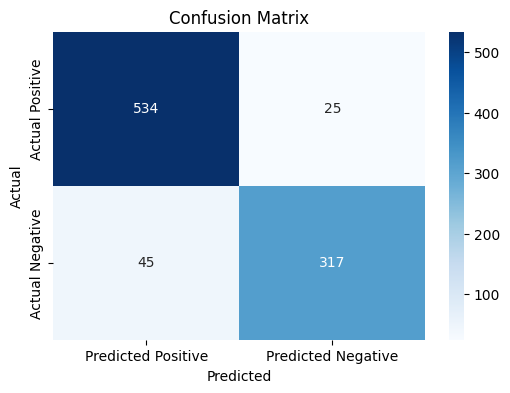

In [318]:
# สร้าง confusion matrix
conf_matrix_sample = confusion_matrix(y_test, y_pred)

# แสดง confusion matrix โดยใช้ไลบรารี seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_sample, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Positive", "Predicted Negative"],
            yticklabels=["Actual Positive", "Actual Negative"])

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [319]:
#นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

In [320]:
# คำนวณผลของ metrics ต่างๆ
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# แสดงผล
print(f"ความแม่นยำ (Accuracy): {accuracy:.4f}")
print(f"ความแม่นยำของการทำนายคลาสบวก (Precision): {precision:.4f}")
print(f"ความครอบคลุม (Recall): {recall:.4f}")
print(f"คะแนน F1 (F1-Score): {f1:.4f}")
print(f"ค่าสหสัมพันธ์แมทธิว (MCC): {mcc:.4f}")

ความแม่นยำ (Accuracy): 0.9240
ความแม่นยำของการทำนายคลาสบวก (Precision): 0.9269
ความครอบคลุม (Recall): 0.8757
คะแนน F1 (F1-Score): 0.9006
ค่าสหสัมพันธ์แมทธิว (MCC): 0.8400


--------------------

In [321]:
from sklearn.metrics import classification_report # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ classification_report

In [322]:
# คำสั่งเรียกดู classification report
report = classification_report(y_test, y_pred)
# แสดงผล
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       559
           1       0.93      0.88      0.90       362

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



note ไว้ก่อน
